## Instalación de Libreria Con Modelos Embeddings Pre-Entrenados.

In [1]:
!pip install -U sentence-transformers

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 268.8/268.8 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: sentence-transformers
    Found existing installation: sentence-transformers 3.2.1
    Uninstalling sentence-transformers-3.2.1:
      Successfully uninstalled sentence-transformers-3.2.1


## Librerias Útiles:

In [2]:
import numpy as np
from sentence_transformers import SentenceTransformer, util
import pandas as pd

## Carga de Modelo Pre-Entrenado y Conversión de Texto a Embeddings

In [3]:
model = SentenceTransformer('all-MiniLM-L6-v2') #Se carga modelo embedding pre-entrenado.

#Lista de frases
sentences = ['el gato juega afuera',
             'me gusta tocar guitarra',
             'me encanta la pasta',
             'esta pelicula estuvo asombrosa',
             'el perro esta afuera',
             'te gusta la musica?',
             'estuvo muy buena la pelicula',
             'te gustaria una pizza?']

#Obtener la representación matemática de cada oración:
embeddings = model.encode(sentences)

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md:   0%|          | 0.00/10.7k [00:00<?, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/466k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

1_Pooling/config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [4]:
embeddings.shape #Cada oración está representada matemáticamente por un vector de 384 dimensiones

(8, 384)

In [5]:
embeddings

array([[-0.03232964,  0.1177517 , -0.04929117, ..., -0.00081667,
        -0.03978718, -0.02792931],
       [-0.03385792,  0.00732811, -0.04184825, ...,  0.04272256,
        -0.02279519, -0.06084862],
       [-0.05483964, -0.03731453, -0.01410466, ...,  0.1172901 ,
         0.07456184, -0.09744944],
       ...,
       [ 0.02240629,  0.0097714 ,  0.01616969, ...,  0.02968126,
         0.01667443, -0.0594423 ],
       [ 0.02290085,  0.00147281,  0.0013893 , ...,  0.08682209,
         0.08835243, -0.13047364],
       [-0.06596523,  0.03551988, -0.04087368, ...,  0.09201567,
         0.00076541, -0.08679893]], dtype=float32)

## Medir Similitud Semántica entre Oraciones:

Para medir la similitud semántica entre dos sentence embeddings generalmente se utilizan dos métricas:








- # Distancia Euclidea:

$$d(A, B) = \sqrt{\sum_{i=1}^{n} (A_i - B_i)^2}
$$

Donde:

- $A = (A_1, A_2, \dots, A_n)$ es el vector que representa la primera oración.

- $B = (B_1, B_2, \dots, B_n)$ es el vector que representa la segunda oración.

- $n$ es la dimensión del espacio dimensional de los embeddings $A$ y $B$.

**Observaciones:**
- Cuando la distancia euclidea entre dos embeddings tiende a cero, significa que semánticamente sus respectivas oraciones son muy similares en cuanto a significado/semántica.
- mientras que cuando esta distancia euclidea más se aleje de cero, significa que sus respectivas oraciones son muy distintas en cuanto a significado/semántica.

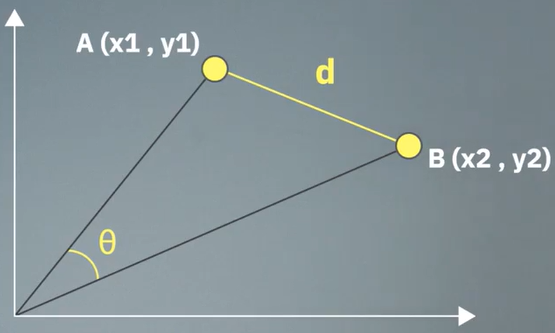

- # Similitud del Coseno:

$$\text{similitud_coseno}(A, B) = \frac{A \cdot B}{\|A\| \|B\|}$$

Donde:

- $A \cdot B$ es el producto punto entre los embeddings $A$ y $B$.

- $\|A\|$ y $\|B\|$ son las normas (magnitudes) de los embeddings $A$  y $B$ respectivamente.

**Observaciones:**
- Cuando la similitud del coseno entre dos embeddings tiende a 1, significa que semánticamente sus respectivas oraciones son muy similares en cuanto a significado/semántica; ya que esto quiere decir que los dos vectores tienen la misma dirección en el espacio dimensional.



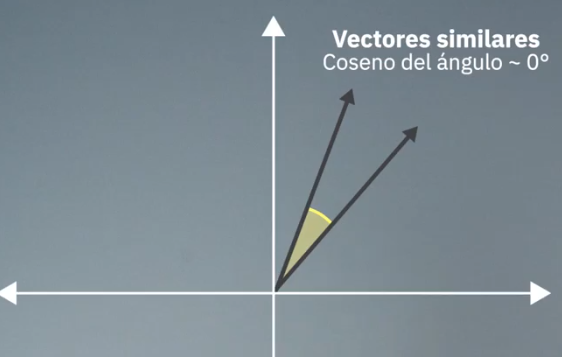

- Mientras que cuando la similitud del coseno entre dos embeddings tiende a -1, significa que semánticamente sus respectivas oraciones son muy diferentes en cuanto a significado/semántica; ya que esto quiere decir que los dos vectores tienen direcciones opuestas en el espacio dimensional.

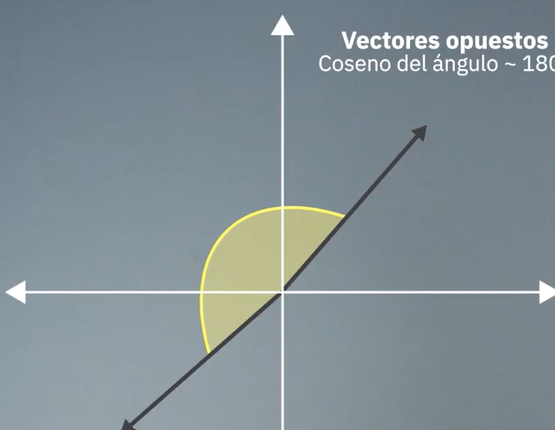

In [6]:
def calcular_similitud(oraciones, embeddings, oracion_ref,metrica):
    """
    DESCRIPTION: Función para medir la similitud semántica entre una oración referencia con una lista de oraciones através de una métrica de
    distancia euclidea o similitud del coseno.
    -----------------------------------------------------------------------------------------------------------------------------------------
    -----------------------------------------------------------------------------------------------------------------------------------------
    PARAMETERS:
    - oraciones (List): Lista de oraciones a comparar con la oración de referencia.
    - embeddings (np.array): Matrix en donde cada fila es el embedding de cada oración.
    - oracion_ref (str): Oración de referencia a comparar.
    - metrica (str): Métrica a utlizar para medir similitud semántica entre las oraciones: euclidean_distance, cosine_similarity
    """
    # Verificamos que la oración de referencia esté en la lista
    if oracion_ref not in oraciones:
        raise ValueError("La oración de referencia no está en la lista.")

    # Obtener el índice de la oración de referencia
    idx_ref = oraciones.index(oracion_ref)

    # Embedding de la oración de referencia
    embedding_ref = embeddings[idx_ref]

    if metrica=="euclidean_distance":

      # Calcular las distancias euclidianas con todas las demás oraciones
      distancias = np.linalg.norm(embeddings - embedding_ref, axis=1)

      # Emparejar cada oración con su distancia
      oraciones_distancias = list(zip(oraciones, distancias))

      # Ordenar por distancia en orden ascendente (menor distancia significa más similar)
      oraciones_distancias_ordenadas = sorted(oraciones_distancias, key=lambda x: x[1])

      return oraciones_distancias_ordenadas

    else:
      # Normalizar los embeddings (norma L2)
      norm_embeddings = embeddings / np.linalg.norm(embeddings, axis=1, keepdims=True)
      norm_embedding_ref = embedding_ref / np.linalg.norm(embedding_ref)

      # Calcular similitud de coseno con todas las demás oraciones
      similitudes = np.dot(norm_embeddings, norm_embedding_ref)

      # Emparejar cada oración con su similitud
      oraciones_similitudes = list(zip(oraciones, similitudes))

      # Ordenar por similitud en orden descendente (mayor similitud primero)
      oraciones_similitudes_ordenadas = sorted(oraciones_similitudes, key=lambda x: x[1], reverse=True)

      return oraciones_similitudes_ordenadas

In [7]:
calcular_similitud(sentences,embeddings,"me gusta tocar guitarra","euclidean_distance")

[('me gusta tocar guitarra', 0.0),
 ('te gusta la musica?', 0.8267501),
 ('te gustaria una pizza?', 0.9517411),
 ('me encanta la pasta', 1.0533851),
 ('el gato juega afuera', 1.0544106),
 ('el perro esta afuera', 1.0683812),
 ('estuvo muy buena la pelicula', 1.1010311),
 ('esta pelicula estuvo asombrosa', 1.104309)]

In [8]:
calcular_similitud(sentences,embeddings,"me gusta tocar guitarra","cosine_similarity")

[('me gusta tocar guitarra', 1.0),
 ('te gusta la musica?', 0.6582421),
 ('te gustaria una pizza?', 0.5470945),
 ('me encanta la pasta', 0.44518983),
 ('el gato juega afuera', 0.44410932),
 ('el perro esta afuera', 0.4292809),
 ('estuvo muy buena la pelicula', 0.39386538),
 ('esta pelicula estuvo asombrosa', 0.39025092)]

## Visualización de Embeddings de Palabras en el Espacio Dimensional:

In [9]:
words = [
    # Palabras semánticamente relacionadas (animales)
    "dog", "cat", "wolf", "tiger", "lion",

    # Palabras semánticamente relacionadas (frutas)
    "apple", "banana", "orange", "strawberry", "grape",

    # Palabras semánticamente relacionadas (colores)
    "red", "blue", "green", "yellow", "purple",

    # Palabras semánticamente relacionadas (vehículos)
    "car", "bus", "bicycle", "train", "airplane",

    # Palabras semánticamente relacionadas (partes del cuerpo)
    "hand", "foot", "eye", "ear", "nose",

    # Palabras semánticamente relacionadas (emociones)
    "happy", "sad", "angry", "excited", "bored",

    # Palabras no relacionadas (mezcla de conceptos muy diferentes)
    "rock", "idea", "algorithm", "mountain", "ocean",

    # Palabras semánticamente relacionadas (profesiones)
    "doctor", "engineer", "teacher", "lawyer", "nurse",

    # Palabras semánticamente relacionadas (países)
    "Colombia", "Brazil", "Japan", "Germany", "Australia",

    # Palabras semánticamente relacionadas (planetas)
    "Mercury", "Venus", "Earth", "Mars", "Jupiter",

    # Palabras muy diferentes (mezcla heterogénea)
    "keyboard", "happiness", "rain", "volcano", "elephant",

    # Palabras semánticamente relacionadas (comida)
    "bread", "pizza", "cheese", "soup", "salad",

    # Palabras semánticamente relacionadas (electrodomésticos)
    "refrigerator", "oven", "microwave", "washing_machine", "vacuum_cleaner"
]

embeddings=model.encode(words)


In [10]:
#Llevamos los Embeddings a un archivo tsv
df_embeddings = pd.DataFrame(embeddings)
df_embeddings.to_csv('embeddings.tsv',sep='\t', index=False)

In [11]:
#Llevamos las etiquetas de los embeddings a un archivo tsv
df_words = pd.DataFrame(words)
df_words.to_csv('labels.tsv',sep='\t', index=False)

Podemos utilizar el [Embedding Projector de TensorFlow](https://projector.tensorflow.org/) para hacer una reducción de dimensión a los embeddings y observarlos en un espacio de 2 o tres dimensiones para observar la relación semántica entre las palabras.